In [1]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset_path = input("Enter your dataset path: ")
nrows = input("Read only first N rows: ")
df = pd.read_csv(dataset_path, nrows=int(nrows))

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Initial Exploration

In [4]:
# Overview
print("🔹 Dataset Overview:")
print(df.info())

# Checking Missing Values
print("\n🔹 Missing Values:")
print(df.isnull().sum())

🔹 Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

🔹 Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin     

In [5]:
# Categorical vs Numerical
num_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
print("🔹 Numerical Features:", num_cols)
print("🔹 Categorical Features:", cat_cols)

🔹 Numerical Features: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
🔹 Categorical Features: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [6]:
print("🔹 Summary Statistics:")
print(df.describe(include='all'))

🔹 Summary Statistics:
        PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   577   
mean     446.000000    0.383838    2.308642                      NaN   NaN   
std      257.353842    0.486592    0.836071                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      223.500000    0.000000    2.000000                      NaN   NaN   
50%      446.000000    0.000000    3.000000                      NaN   NaN   
75%      668.500000    1.000000    3.000000                      NaN   NaN   
max      891.000000    1.000000    3.000000                      NaN   NaN   

               Age       SibSp       Parc

### Skewness & Kurtosis analysis

In [7]:
# Check Skewness & Kurtosis
print("\n🔹 Skewness & Kurtosis:")
for col in num_cols:
    print(f"{col}: Skewness={skew(df[col].dropna()):.2f}, Kurtosis={kurtosis(df[col].dropna()):.2f}")


🔹 Skewness & Kurtosis:
PassengerId: Skewness=0.00, Kurtosis=-1.20
Survived: Skewness=0.48, Kurtosis=-1.77
Pclass: Skewness=-0.63, Kurtosis=-1.28
Age: Skewness=0.39, Kurtosis=0.17
SibSp: Skewness=3.69, Kurtosis=17.77
Parch: Skewness=2.74, Kurtosis=9.72
Fare: Skewness=4.78, Kurtosis=33.20


In [8]:
# Compute Skewness & Kurtosis
skew_kurt_list = []

for col in num_cols:
    skewness = skew(df[col].dropna())
    kurt_val = kurtosis(df[col].dropna())
    skew_kurt_list.append({
        "Feature": col,
        "Skewness": skewness,
        "Kurtosis": kurt_val,
    })

# Convert list to DataFrame
skew_kurt_df = pd.DataFrame(skew_kurt_list)

# Identify the most skewed & highest kurtosis features
top_skewed_features = skew_kurt_df.loc[skew_kurt_df["Skewness"].abs().nlargest(4).index, "Feature"]
top_kurtosis_features = skew_kurt_df.loc[skew_kurt_df["Kurtosis"].nlargest(4).index, "Feature"]

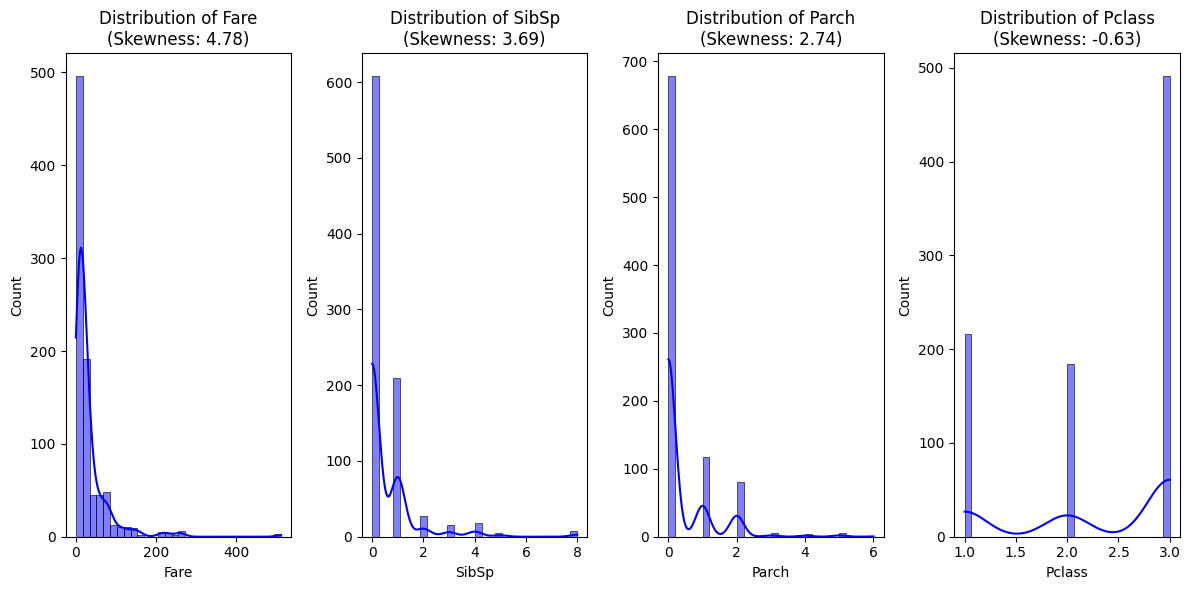

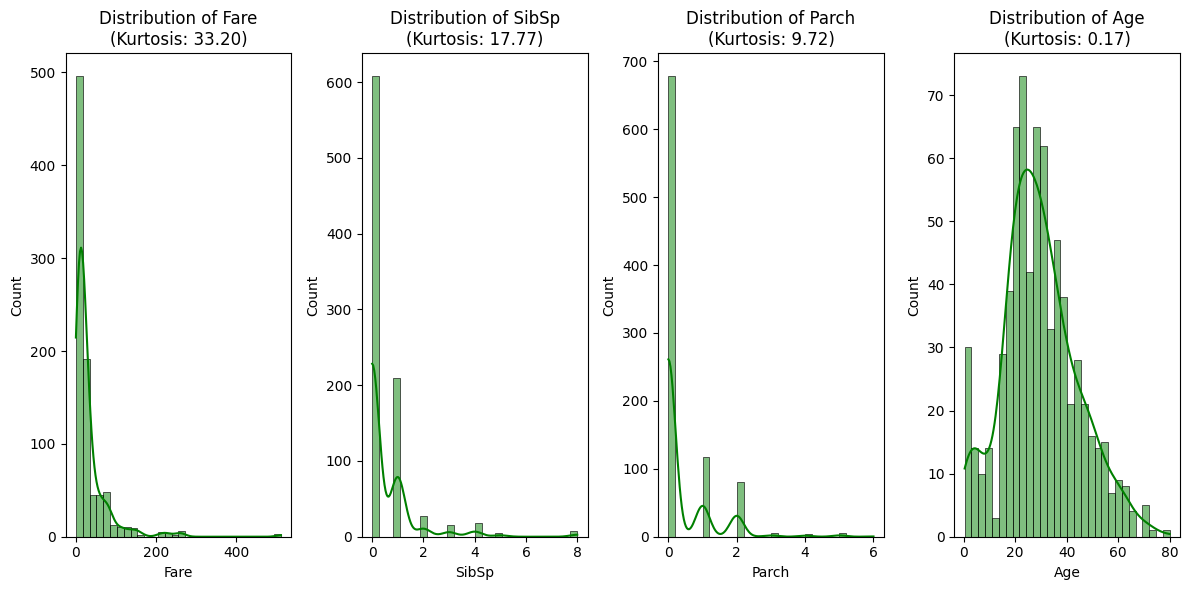


🔹 Key Insights:
📌 Most Skewed Features: Fare, SibSp, Parch, Pclass
📌 Highest Kurtosis Features: Fare, SibSp, Parch, Age


In [9]:
# 📊 Visualization of Highly Skewed Distributions
plt.figure(figsize=(12, 6))
for i, feature in enumerate(top_skewed_features):
    plt.subplot(1, len(top_skewed_features), i+1)
    sns.histplot(df[feature], bins=30, kde=True, color='blue')
    plt.title(f"Distribution of {feature}\n(Skewness: {skew_kurt_df[skew_kurt_df['Feature'] == feature]['Skewness'].values[0]:.2f})")
plt.tight_layout()
plt.show()

# 📊 Visualization of Highly Kurtotic Distributions
plt.figure(figsize=(12, 6))
for i, feature in enumerate(top_kurtosis_features):
    plt.subplot(1, len(top_kurtosis_features), i+1)
    sns.histplot(df[feature], bins=30, kde=True, color='green')
    plt.title(f"Distribution of {feature}\n(Kurtosis: {skew_kurt_df[skew_kurt_df['Feature'] == feature]['Kurtosis'].values[0]:.2f})")
plt.tight_layout()
plt.show()

# 📢 Key Insights
print("\n🔹 Key Insights:")
print(f"📌 Most Skewed Features: {', '.join(top_skewed_features)}")
print(f"📌 Highest Kurtosis Features: {', '.join(top_kurtosis_features)}")

### Correlation analysis with heatmaps

In [10]:
# Correlation Analysis
print("\n🔹 Feature Correlations:")
correlation_matrix = df[num_cols].corr()
print(correlation_matrix)


🔹 Feature Correlations:
             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


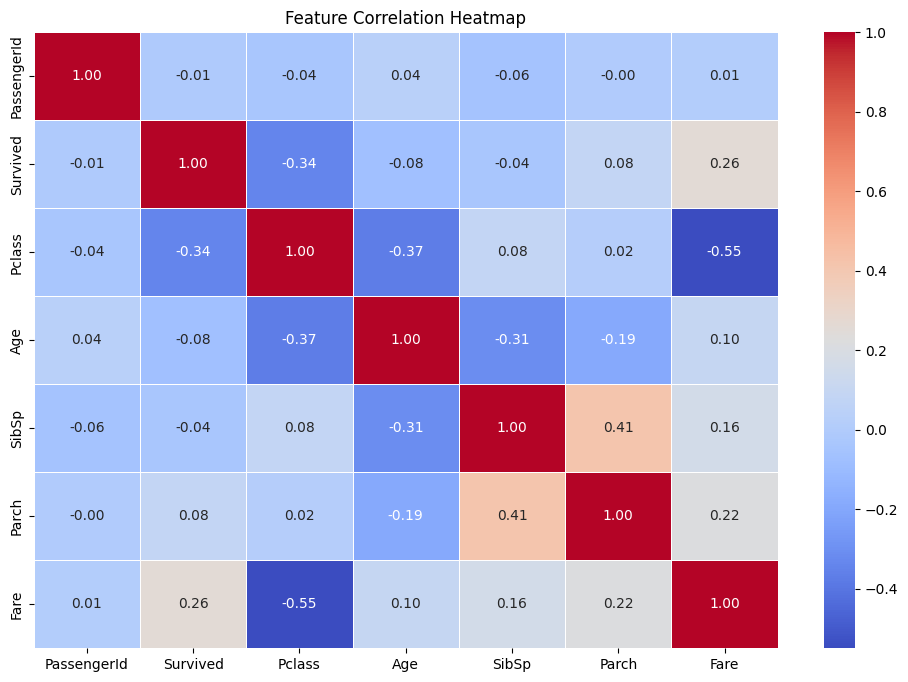

In [11]:
# 3️⃣ Flatten the correlation matrix for better readability
corr_pairs = correlation_matrix.unstack().reset_index()
corr_pairs.columns = ["Feature 1", "Feature 2", "Correlation"]

# Remove self-correlations (correlation of a feature with itself)
corr_pairs = corr_pairs[corr_pairs["Feature 1"] != corr_pairs["Feature 2"]]

# Sort by absolute correlation value (strongest first)
corr_pairs = corr_pairs.sort_values(by="Correlation", ascending=False).drop_duplicates(subset=["Feature 1", "Feature 2"])

# 5️⃣ Identify Highly Correlated Features (Threshold: 0.9)
high_corr_features = set()
high_corr_pairs = corr_pairs[corr_pairs["Correlation"].abs() > 0.9]

if not high_corr_pairs.empty:
    print("\n⚠️ Features with **very high correlation** (> 0.9):")
    for _, row in high_corr_pairs.iterrows():
        print(f"🔹 {row['Feature 1']} and {row['Feature 2']} (Correlation: {row['Correlation']:.2f})")
        high_corr_features.add(row["Feature 2"])  # Suggest removing one of the correlated pairs

    print("\n📌 Suggestion: Consider removing one of the following redundant features:")
    print(", ".join(high_corr_features))

# 7️⃣ Improved Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

### More Visualization

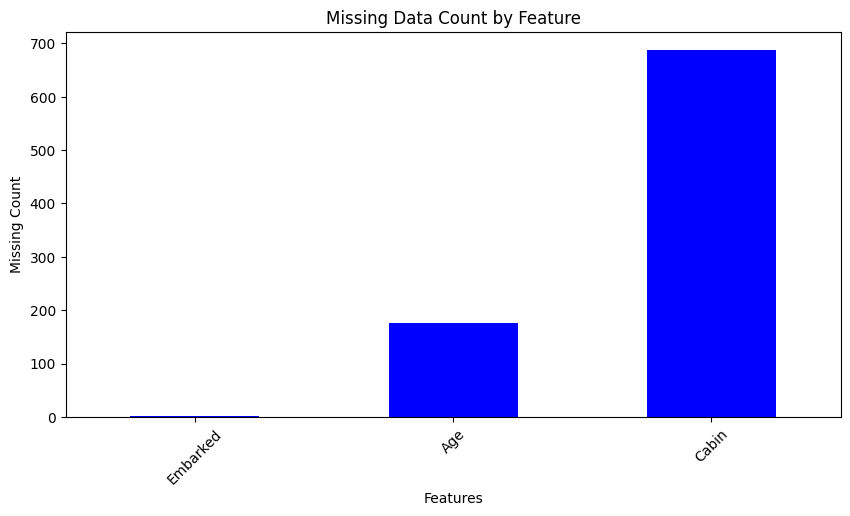

In [12]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]  

# Missing Data Visualization (Bar Plot)
if not missing_values.empty:
    plt.figure(figsize=(10, 5))
    missing_values.sort_values().plot(kind="bar", color="blue")
    plt.title("Missing Data Count by Feature")
    plt.xlabel("Features")
    plt.ylabel("Missing Count")
    plt.xticks(rotation=45)
    plt.show()

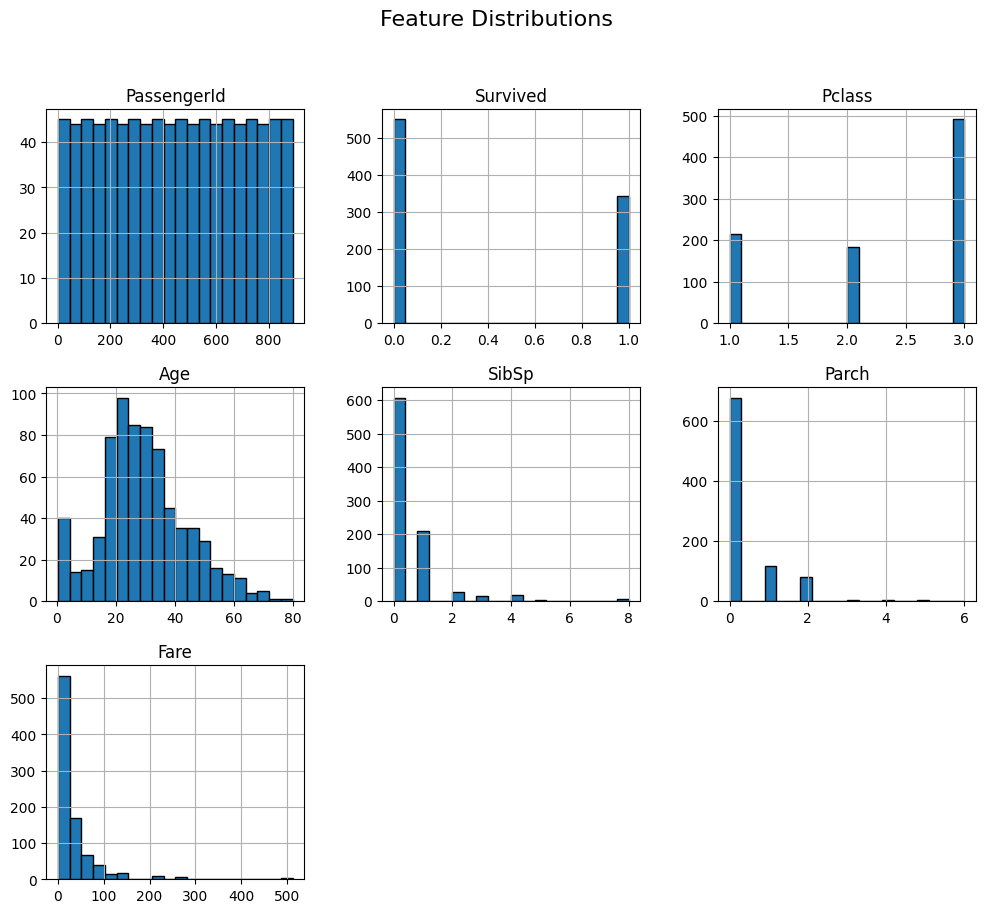

In [13]:
# Histograms for Numerical Features
df[num_cols].hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

<Figure size 1200x800 with 0 Axes>

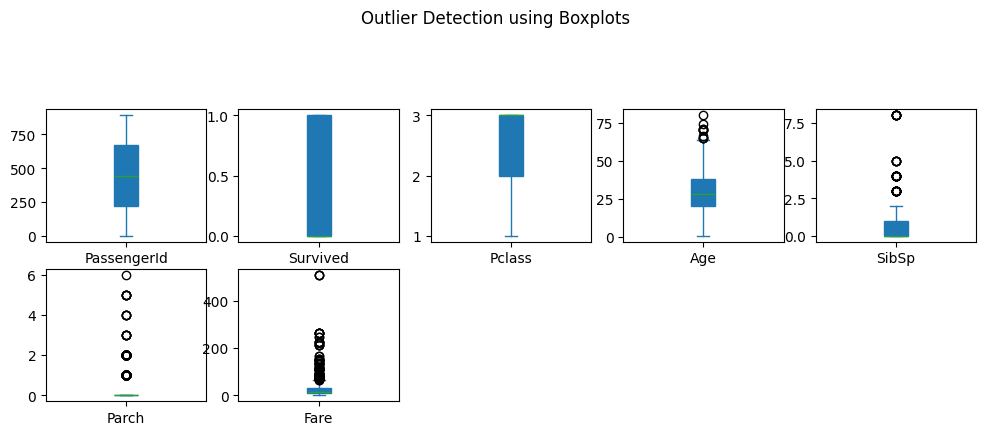

In [14]:
# Boxplots for Outlier Detection
plt.figure(figsize=(12, 8))
df[num_cols].plot(kind='box', subplots=True, layout=(5, 5), figsize=(12, 10), patch_artist=True)
plt.suptitle("Outlier Detection using Boxplots")
plt.show()